In [56]:
!pip install emoji

In [57]:
import numpy as np
import pandas as pd

In [58]:
train= pd.read_csv("train_emoji.csv", header=None)
train.drop(labels=[2, 3], axis=1, inplace=True)
test= pd.read_csv("test_emoji.csv", header= None)
train.head()

,0,1
0,never talk to me again,3
1,I am proud of your achievements,2
2,It is the worst day in my life,3
3,Miss you so much,0
4,food is life,4


In [59]:
test.head()

,0,1
0,I want to eat\t,4
1,he did not answer\t,3
2,he got a raise\t,2
3,she got me a present\t,0
4,ha ha ha it was so funny\t,2


In [60]:
import emoji as emoji

In [61]:
emoji_dictionary = {"0": "\u2764\uFE0F",    # :heart: prints a black instead of red heart depending on the font
                    "1": ":baseball:",
                    "2": ":beaming_face_with_smiling_eyes:",
                    "3": ":downcast_face_with_sweat:",
                    "4": ":fork_and_knife:"
                   }

In [62]:
emoji.emojize(":grinning_face:")

'😀'

In [63]:
for e in emoji_dictionary.values():
    print(emoji.emojize(e))

❤️
⚾
😁
😓
🍴


In [64]:
data = train.values
for i in range(25):
    print(data[i][0],emoji.emojize(emoji_dictionary[str(data[i][1])]))

never talk to me again 😓
I am proud of your achievements 😁
It is the worst day in my life 😓
Miss you so much ❤️
food is life 🍴
I love you mum ❤️
Stop saying bullshit 😓
congratulations on your acceptance 😁
The assignment is too long  😓
I want to go play ⚾
she did not answer my text  😓
Your stupidity has no limit 😓
how many points did he score ⚾
my algorithm performs poorly 😓
I got approved 😁
Stop shouting at me 😓
Sounds like a fun plan ha ha 😁
no one likes him 😓
the game just finished ⚾
I will celebrate soon 😁
So sad you are not coming 😓
She is my dearest love ❤️
Good job 😁
It was funny lol 😁
candy is life  😁


In [67]:
from keras.utils import to_categorical

X_train= train[0]
Y_train= train[1]

X_test= test[0]
Y_test= test[1]
    
Y_train = to_categorical(Y_train)
Y_test= to_categorical(Y_test)

X_test = np.asarray(X_test)
Y_test = np.asarray(Y_test)
X_train= np.asarray(X_train)
Y_train= np.asarray(Y_train)

#for i in range(132):
    #X_train[i]= X_train[i].split()

In [68]:
#for i in range(56):
    #X_test[i]= X_test[i].split()

In [69]:
print(X_test[0])

['I', 'want', 'to', 'eat']


In [70]:
def listToString(s):
    str1 = " "
    return (str1.join(s))

In [71]:
#for i in range(56):
    #X_test[i]= listToString(X_test[i])

#for i in range(132):
    #X_train[i]= listToString(X_train[i])
    
print(X_test[0])

I want to eat


In [72]:
embeddings = {}
with open(r'glove.6B.50d.txt',encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coeffs = np.asarray(values[1:],dtype='float32')

        embeddings[word] = coeffs

In [73]:
def getOutputEmbeddings(X):
    
    embedding_matrix_output = np.zeros((X.shape[0],10,50))
    for ix in range(X.shape[0]):
        X[ix] = X[ix].split()
        for jx in range(len(X[ix])):
            embedding_matrix_output[ix][jx] = embeddings[X[ix][jx].lower()]
            
    return embedding_matrix_output

In [74]:
emb_XTrain= getOutputEmbeddings(X_train)
emb_XTest= getOutputEmbeddings(X_test)

In [75]:
print(X_train[0])
print(X_test[0])

['never', 'talk', 'to', 'me', 'again']
['I', 'want', 'to', 'eat']


In [34]:
#for i in range(56):
    #X_test[i]= listToString(X_test[i])

#for i in range(132):
    #X_train[i]= listToString(X_train[i])
    
print(X_test[0])

I want to eat


In [76]:
print(emb_XTrain.shape)
print(emb_XTest.shape)

(132, 10, 50)
(56, 10, 50)


In [77]:
from tensorflow.keras.layers import LSTM, Dropout, Dense, Activation
from tensorflow.keras.models import Sequential

In [78]:
model = Sequential()
model.add(LSTM(64,input_shape=(10,50),return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(64,input_shape=(10,50)))
model.add(Dropout(0.3))
model.add(Dense(5))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 10, 64)            29440     
                                                                 
 dropout_2 (Dropout)         (None, 10, 64)            0         
                                                                 
 lstm_3 (LSTM)               (None, 64)                33024     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 5)                 325       
                                                                 
 activation_1 (Activation)   (None, 5)                 0         
                                                                 
Total params: 62,789
Trainable params: 62,789
Non-trai

In [79]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])
history= model.fit(emb_XTrain,Y_train,batch_size=32,epochs=100,shuffle=True,validation_split=0.1)

Epoch 1/100
4/4 [==============================] - 11s 655ms/step - loss: 1.5826 - acc: 0.2627 - val_loss: 1.6047 - val_acc: 0.2143
Epoch 2/100
4/4 [==============================] - 0s 40ms/step - loss: 1.5369 - acc: 0.3051 - val_loss: 1.6308 - val_acc: 0.1429
Epoch 3/100
4/4 [==============================] - 0s 40ms/step - loss: 1.4919 - acc: 0.3475 - val_loss: 1.6499 - val_acc: 0.1429
Epoch 4/100
4/4 [==============================] - 0s 38ms/step - loss: 1.4665 - acc: 0.4068 - val_loss: 1.6344 - val_acc: 0.1429
Epoch 5/100
4/4 [==============================] - 0s 40ms/step - loss: 1.4226 - acc: 0.4322 - val_loss: 1.5862 - val_acc: 0.2857
Epoch 6/100
4/4 [==============================] - 0s 39ms/step - loss: 1.3767 - acc: 0.4576 - val_loss: 1.5075 - val_acc: 0.2143
Epoch 7/100
4/4 [==============================] - 0s 47ms/step - loss: 1.3078 - acc: 0.5339 - val_loss: 1.4059 - val_acc: 0.3571
Epoch 8/100
4/4 [==============================] - 0s 51ms/step - loss: 1.2000 - acc: 0.

4/4 [==============================] - 0s 42ms/step - loss: 0.0457 - acc: 0.9915 - val_loss: 1.6919 - val_acc: 0.5714
Epoch 64/100
4/4 [==============================] - 0s 36ms/step - loss: 0.0982 - acc: 0.9576 - val_loss: 1.0053 - val_acc: 0.6429
Epoch 65/100
4/4 [==============================] - 0s 39ms/step - loss: 0.0551 - acc: 0.9746 - val_loss: 0.4453 - val_acc: 0.7857
Epoch 66/100
4/4 [==============================] - 0s 43ms/step - loss: 0.0487 - acc: 0.9915 - val_loss: 0.5685 - val_acc: 0.7857
Epoch 67/100
4/4 [==============================] - 0s 45ms/step - loss: 0.0566 - acc: 0.9915 - val_loss: 0.9424 - val_acc: 0.7143
Epoch 68/100
4/4 [==============================] - 0s 38ms/step - loss: 0.0285 - acc: 1.0000 - val_loss: 1.3910 - val_acc: 0.5714
Epoch 69/100
4/4 [==============================] - 0s 40ms/step - loss: 0.0524 - acc: 0.9746 - val_loss: 1.0188 - val_acc: 0.7143
Epoch 70/100
4/4 [==============================] - 0s 38ms/step - loss: 0.0273 - acc: 0.9915 - 

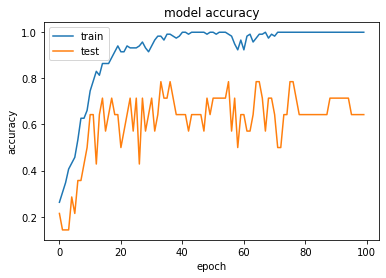

In [80]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

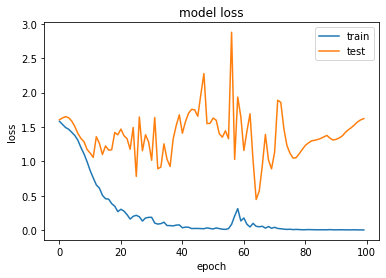

In [81]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [82]:
model.evaluate(emb_XTest,Y_test)

2/2 [==============================] - 0s 16ms/step - loss: 1.9249 - acc: 0.6071


[1.9249134063720703, 0.6071428656578064]

In [83]:
pred = np.argmax(model.predict(emb_XTest),axis=1)

2/2 [==============================] - 2s 16ms/step


In [84]:
pred.shape

(56,)

In [85]:
for i in range(40):
    print(' '.join(X_test[i]))
    print(emoji.emojize(emoji_dictionary[str(np.argmax(Y_test[i]))]))

I want to eat
🍴
he did not answer
😓
he got a raise
😁
she got me a present
❤️
ha ha ha it was so funny
😁
he is a good friend
❤️
I am upset
❤️
We had such a lovely dinner tonight
❤️
where is the food
🍴
Stop making this joke ha ha ha
😁
where is the ball
⚾
work is hard
😓
This girl is messing with me
😓
are you serious ha ha
😁
Let us go play baseball
⚾
This stupid grader is not working
😓
work is horrible
😓
Congratulation for having a baby
😁
stop messing around
😓
any suggestions for dinner
🍴
I love taking breaks
❤️
you brighten my day
😁
I boiled rice
🍴
she is a bully
😓
Why are you feeling bad
😓
I am upset
😓
I worked during my birthday
😓
My grandmother is the love of my life
❤️
enjoy your break
😁
valentine day is near
❤️
I miss you so much
❤️
throw the ball
⚾
My life is so boring
😓
she said yes
😁
will you be my valentine
❤️
he can pitch really well
⚾
dance with me
😁
I am starving
🍴
See you at the restaurant
🍴
I like to laugh
😁


In [86]:
with open("model.json", "w") as file:
    file.write(model.to_json())
model.save_weights("model.h5")

In [87]:
from keras.models import model_from_json

In [88]:
with open("model.json", "r") as file:
    model = model_from_json(file.read())
model.load_weights("model.h5")

In [89]:
test_str = "its so painful"
X = pd.Series([test_str])
emb_X = getOutputEmbeddings(X)
p = np.argmax(model.predict(emb_X),axis=1)
print(' '.join(X[0]))
print(emoji.emojize(emoji_dictionary[str(p[0])]))

1/1 [==============================] - 3s 3s/step
its so painful
😓
